In [2]:
# Titanic problem from Kaggle
# Date Nov 23 

In [3]:
# loading the necessary packages of numpy, pandas and plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
%pwd

u'C:\\Users\\SNara7157541\\Documents'

In [5]:
path = 'C:\\Analytics\\kaggle\\titanic\\train.csv'

In [6]:
# load the training data file, td is training data  
td = pd.read_csv(path)

In [7]:
# first look at training data 
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# more info on the training data 
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# The features like names does not bring in a new information. It does not make sense if survival rate depends on names and even 
# if there correlation , it is meaningless.  For now , let also rule out ticket and cabin - so few data points. 
# whenever we change the training dataset, lets create a new lable so that we preserve the previous set intact. 

# $ The cabin has a lot of missing data so let get's rid of it. 

td_1 = td.drop(['Ticket','Cabin','Name'],axis=1)

In [10]:
#looking at the new data set. 

td_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
#looking at the new data set - cont. 
td_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [13]:
# We still have missing data in Embarked and age column. 
# 1st lets put the missing value of Embarked ports. Only 2 values missings 

embarked_ports = sorted(td_1['Embarked'].unique())
embarked_ports



[nan, 'C', 'Q', 'S']

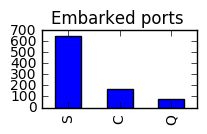

In [15]:
# it looks like 2 places have nan values . we can replace it with one of the port values 
#histogram of embarked ports 
plt.figure(figsize=(2,1))
td_1.Embarked.value_counts().plot(kind='bar')
plt.title('Embarked ports ')


In [21]:
td_1['Embarked'].fillna('S',inplace=True)


In [22]:
embarked_ports = sorted(td_1['Embarked'].unique())
embarked_ports

['C', 'Q', 'S']

In [24]:
###########################


In [25]:
td_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [ ]:
### we still have lot of the numbers missing in the age group. 
#Let us find what the distribution is  for age. 

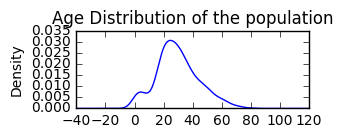

In [26]:
# looking at the age distribution 
plt.figure(figsize=(3,1))
td_1.Age.plot('kde')
plt.title("Age Distribution of the population")

# sets our legend for our graph.

In [ ]:
# it appears like a standard distribution but let us if there is any survival parameter dependency 

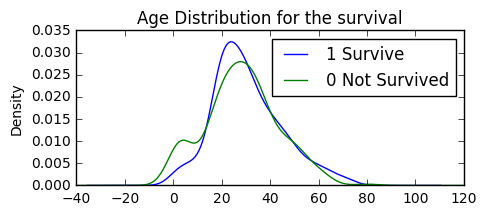

In [30]:
# Age distribution by survial parameter 
plt.figure(figsize=(5,2))
td_1.Age[td_1.Survived == 0].plot('kde')
td_1.Age[td_1.Survived == 1].plot('kde')
plt.legend(('1 Survive', '0 Not Survived'),loc='best') 
plt.title("Age Distribution for the survival")

# sets our legend for our graph.


In [31]:
# Since the population is a normal distribution , we can replace the missing Age values with mean 

In [32]:
# mean value for the age for the population 

mean_age = td_1['Age'].mean()
mean_age

29.69911764705882

In [33]:
td_1['Age'].fillna(29.7,inplace=True)

In [34]:
td_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


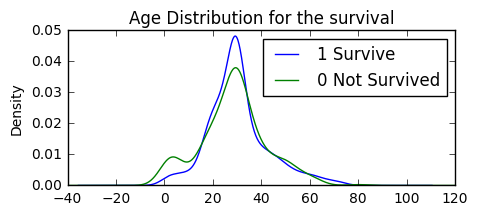

In [35]:
# Age distribution by survial parameter 
## After the adjustment of filling blank observations on AGE
plt.figure(figsize=(5,2))
td_1.Age[td_1.Survived == 0].plot('kde')
td_1.Age[td_1.Survived == 1].plot('kde')
plt.legend(('1 Survive', '0 Not Survived'),loc='best') 
plt.title("Age Distribution for the survival")

# sets our legend for our graph.


In [36]:
# it looks like the distribution is slihtly shifted but still very close. 

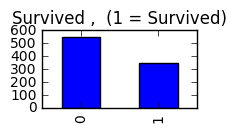

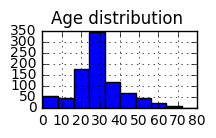

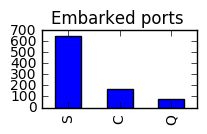

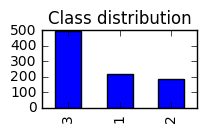

In [38]:
# let us vizualize the data 
# No sense to plot passengerID. 
# lets look at who survived, How many males and females, age distribution and ports embarked. 

# Histogram of Survived in total 
plt.figure(figsize=(2, 1))
td_1.Survived.value_counts().plot(kind='bar')
plt.title("Survived ,  (1 = Survived)")

#histogram for Age , again since we have the PDF already 
plt.figure(figsize=(2, 1))
td_1['Age'].hist()
plt.title("Age distribution ")


#histogram of embakment 
plt.figure(figsize=(2,1))
td_1.Embarked.value_counts().plot(kind='bar')
plt.title('Embarked ports ')

#histogram of class distribution 
plt.figure(figsize=(2,1))
td_1.Pclass.value_counts().plot(kind='bar')
plt.title('Class distribution')

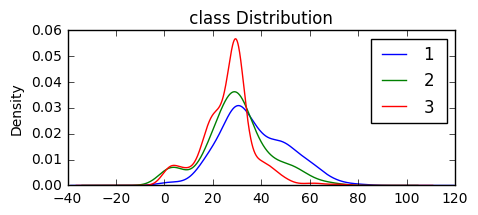

In [40]:
# It looks like the survival rate is similar for the ages. 
# let us look at the class distribution and survival 

plt.figure(figsize=(5,2))
td_1.Age[td_1.Pclass == 1].plot('kde')
td_1.Age[td_1.Pclass == 2].plot('kde')
td_1.Age[td_1.Pclass == 3].plot('kde')
plt.legend(('1 ', '2 ', '3'),loc='best') 
plt.title(" class Distribution ")

In [41]:
# separating by survival 
td_1_Survived = td_1[td_1.Survived == 1] 
td_1_NSurvived = td_1[td_1.Survived == 0] 

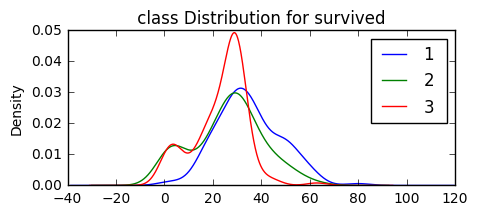

In [42]:
# It looks like the survival rate is similar for the ages. 
# let us look at the class distribution and survival 

plt.figure(figsize=(5,2))
td_1_Survived.Age[td_1_Survived.Pclass == 1].plot('kde')
td_1_Survived.Age[td_1_Survived.Pclass == 2].plot('kde')
td_1_Survived.Age[td_1_Survived.Pclass == 3].plot('kde')
plt.legend(('1 ', '2 ', '3'),loc='best') 
plt.title(" class Distribution for survived ")

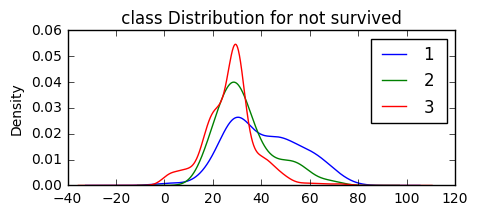

In [43]:
# It looks like the survival rate is similar for the ages. 
# let us look at the class distribution and survival 

plt.figure(figsize=(5,2))
td_1_NSurvived.Age[td_1_NSurvived.Pclass == 1].plot('kde')
td_1_NSurvived.Age[td_1_NSurvived.Pclass == 2].plot('kde')
td_1_NSurvived.Age[td_1_NSurvived.Pclass == 3].plot('kde')
plt.legend(('1 ', '2 ', '3'),loc='best') 
plt.title(" class Distribution for not survived ")

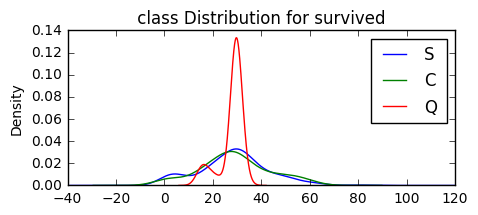

In [44]:
# It looks like the survival rate is similar for the ages. 
# let us look at the class distribution and survival 

plt.figure(figsize=(5,2))
td_1_Survived.Age[td_1_Survived.Embarked == 'S'].plot('kde')
td_1_Survived.Age[td_1_Survived.Embarked == 'C'].plot('kde')
td_1_Survived.Age[td_1_Survived.Embarked == 'Q'].plot('kde')
plt.legend(('S ', 'C', 'Q'),loc='best') 
plt.title(" class Distribution for survived ")

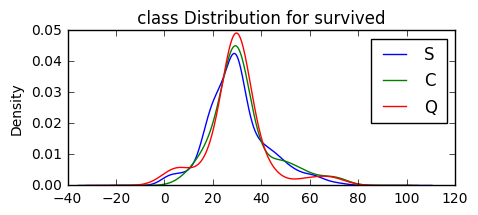

In [45]:
# It looks like the survival rate is similar for the ages. 
# let us look at the class distribution and survival 

plt.figure(figsize=(5,2))
td_1_NSurvived.Age[td_1_NSurvived.Embarked == 'S'].plot('kde')
td_1_NSurvived.Age[td_1_NSurvived.Embarked == 'C'].plot('kde')
td_1_NSurvived.Age[td_1_NSurvived.Embarked == 'Q'].plot('kde')
plt.legend(('S ', 'C', 'Q'),loc='best') 
plt.title(" class Distribution for survived ")

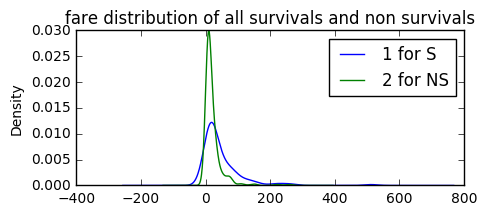

In [50]:
# lets look at the fare distribution 
plt.figure(figsize=(5,2))
td_1_Survived.Fare.plot('kde')
td_1_NSurvived.Fare.plot('kde')
plt.legend(('1 for S','2 for NS'),loc='best')
plt.title('fare distribution of all survivals and non survivals')

In [53]:
# separating by survival and gender.
td_1_Sur_male = td_1_Survived[td_1_Survived.Sex == 'male'] 
td_1_NSur_male = td_1_NSurvived[td_1_NSurvived.Sex == 'male'] 
td_1_Sur_female = td_1_Survived[td_1_Survived.Sex == 'female'] 
td_1_NSur_female = td_1_NSurvived[td_1_NSurvived.Sex == 'female'] 


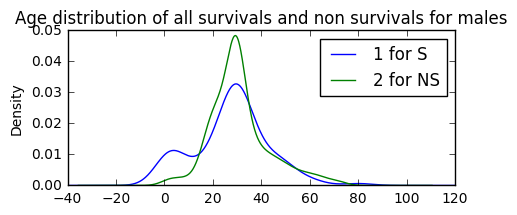

In [54]:
# lets look at the fare distribution 
plt.figure(figsize=(5,2))
td_1_Sur_male.Age.plot('kde')
td_1_NSur_male.Age.plot('kde')
plt.legend(('1 for S','2 for NS'),loc='best')
plt.title('Age distribution of all survivals and non survivals for males')

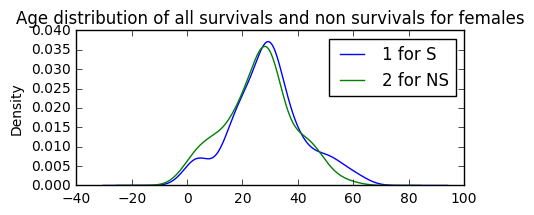

In [55]:
# lets look at the fare distribution 
plt.figure(figsize=(5,2))
td_1_Sur_female.Age.plot('kde')
td_1_NSur_female.Age.plot('kde')
plt.legend(('1 for S','2 for NS'),loc='best')
plt.title('Age distribution of all survivals and non survivals for females')

In [ ]:
## No clear distribution for the survival and non survival by age, gender, Fare, Port of Embarkment,

In [ ]:
# lets look at the family size, the siblings and parents 

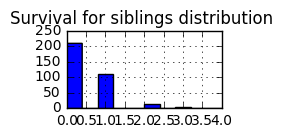

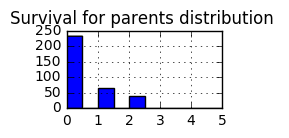

In [58]:
#histogram for family for survived
plt.figure(figsize=(2, 1))
td_1_Survived['SibSp'].hist()
plt.title("Survival for siblings distribution ")

plt.figure(figsize=(2, 1))
td_1_Survived['Parch'].hist()
plt.title("Survival for parents distribution ")


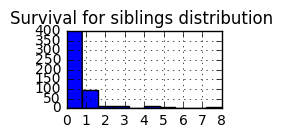

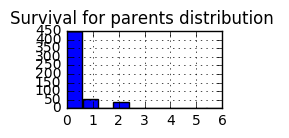

In [57]:
#histogram for family for survived
plt.figure(figsize=(2, 1))
td_1_NSurvived['SibSp'].hist()
plt.title("Survival for siblings distribution ")

plt.figure(figsize=(2, 1))
td_1_NSurvived['Parch'].hist()
plt.title("Survival for parents distribution ")

In [59]:
# it appears there is some difference in the distribution but cannot be separated easily .  

In [61]:
# now let us create a coding for categorical values 

sexes = sorted(td_1['Sex'].unique())
sexes
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [62]:
# Now let us map the sex to a numerical value 
# male =1 and female =0 
td_1['Sex_Val'] = td_1['Sex'].map(genders_mapping).astype(int)
td_1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Val
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [64]:
ports = sorted(td_1['Embarked'].unique())
ports
port_mapping = dict(zip(ports, range(1, len(ports) + 1)))
port_mapping

{'C': 1, 'Q': 2, 'S': 3}

In [66]:
# Now let us map the sex to a numerical value 
# male =1 and female =0 
td_1['Embarked_Val'] = td_1['Embarked'].map(port_mapping).astype(int)
td_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Val,Embarked_Val
0,1,0,3,male,22.0,1,0,7.2500,S,1,3
1,2,1,1,female,38.0,1,0,71.2833,C,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,3
3,4,1,1,female,35.0,1,0,53.1000,S,0,3
4,5,0,3,male,35.0,0,0,8.0500,S,1,3


In [72]:
# we have so far looked at various breakdowns and it is not simple and clear from the probability density functions that one 
# group can be easily classified from the other. 

In [73]:
#Let us put the mapping into a function, 
#  1. drop the features which are names of few columns such as names , ticket and cabin 
#  2. drop the observations which have missing data 
# 3. convert the embarked ports, genders into numbers like class , Parch and sisb. 
# 4.finally drop the passengerid 
# 5. convert into a numpy matrix return the matrix 
# 6. the first column here is the survived which is the results ~ function (class, gender, age, siblising, parents, fare, ports)

def data_prep3(data_set):
    
    # dropping the unnecessary features 
    data_set = data_set.drop(['Ticket','Cabin','Name'],axis=1)
    
    # dropping the missing observations is not an option for submission. 
    # we fill the port Embarked with S , largest group boards there 
    # we fill the missing age with mean of the population. 
    #    data_set = data_set.dropna()
    
    data_set['Embarked'].fillna('S',inplace=True)
    
    # mean value for the age for the population 

    mean_age = data_set['Age'].mean()
    data_set['Age'].fillna(mean_age,inplace=True)
    
    
    #mapping the categorical data 
    # Sex and Embarked columns are to be converted 
    
    Sexes = sorted(data_set['Sex'].unique())
    Ports = sorted(data_set['Embarked'].unique())
    
    gender_mapping = dict(zip(Sexes,range(0,len(Sexes)+1)))
    port_mapping   =dict(zip(Ports,range(1,len(Ports)+1)))
    
    data_set['Sex_val'] = data_set['Sex'].map(gender_mapping).astype(int)
    data_set['Port_val'] = data_set['Embarked'].map(port_mapping).astype(int)
    
    # now we have additional columns of Port_val, Sex_val 
    # we can remove Sex and Embarked columns 
    
    data_set = data_set.drop(['Sex','Embarked'],axis=1)
    
    # drop passenger ID 
    
    data_set = data_set.drop(['PassengerId'],axis=1)
    
    return data_set


In [ ]:
###########################

In [75]:
train_1 = data_prep3(td)

In [76]:
train_1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_val,Port_val
0,0,3,22.0,1,0,7.2500,1,3
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,0,3
4,0,3,35.0,0,0,8.0500,1,3


In [77]:
## convert to numpy 

train_1_np = train_1.values
train_1_np

array([[  0.        ,   3.        ,  22.        , ...,   7.25      ,
          1.        ,   3.        ],
       [  1.        ,   1.        ,  38.        , ...,  71.2833    ,
          0.        ,   1.        ],
       [  1.        ,   3.        ,  26.        , ...,   7.925     ,
          0.        ,   3.        ],
       ..., 
       [  0.        ,   3.        ,  29.69911765, ...,  23.45      ,
          0.        ,   3.        ],
       [  1.        ,   1.        ,  26.        , ...,  30.        ,
          1.        ,   1.        ],
       [  0.        ,   3.        ,  32.        , ...,   7.75      ,
          1.        ,   2.        ]])

In [78]:
# now list separate into the y and x data sets 

# Training data features, skip the first column 'Survived'
train_1_np_x = train_1_np[:, 1:]

# 'Survived' column values
train_1_np_y = train_1_np[:, 0]

In [79]:
train_1_np_x

array([[  3.        ,  22.        ,   1.        , ...,   7.25      ,
          1.        ,   3.        ],
       [  1.        ,  38.        ,   1.        , ...,  71.2833    ,
          0.        ,   1.        ],
       [  3.        ,  26.        ,   0.        , ...,   7.925     ,
          0.        ,   3.        ],
       ..., 
       [  3.        ,  29.69911765,   1.        , ...,  23.45      ,
          0.        ,   3.        ],
       [  1.        ,  26.        ,   0.        , ...,  30.        ,
          1.        ,   1.        ],
       [  3.        ,  32.        ,   0.        , ...,   7.75      ,
          1.        ,   2.        ]])

In [80]:
train_1_np_y

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [81]:
## trying to check the metrics on the classifier 
# random forest calsfication and cross valiadation 

# classification model 
from sklearn.ensemble import RandomForestClassifier

In [82]:
# first lets start with random forrests and check the number of estimators. 

clf_10 = RandomForestClassifier(n_estimators=10)
clf_50 = RandomForestClassifier(n_estimators=50)
clf_100 = RandomForestClassifier(n_estimators=100)
clf_200 = RandomForestClassifier(n_estimators=200)

In [83]:
# what with 10 random forrests 
# Fit the model to our training data
clf_rf10 = clf_10.fit(train_1_np_x, train_1_np_y)
score_rf10 = clf_rf10.score(train_1_np_x, train_1_np_y)

print " scores  with 10 forrests "

"Mean accuracy of Random Forest with 10 : {0}".format(score_rf10)

 scores  with 10 forrests 


'Mean accuracy of Random Forest with 10 : 0.965207631874'

In [84]:
# what with 50 random forrests 
# Fit the model to our training data
clf_rf50 = clf_50.fit(train_1_np_x, train_1_np_y)
score_rf50 = clf_rf50.score(train_1_np_x, train_1_np_y)

print " scores  with 50 forrests "

"Mean accuracy of Random Forest with 50 : {0}".format(score_rf50)

 scores  with 50 forrests 


'Mean accuracy of Random Forest with 50 : 0.982042648709'

In [85]:
# what with 100 random forrests 
# Fit the model to our training data
clf_rf100 = clf_100.fit(train_1_np_x, train_1_np_y)
score_rf100 = clf_rf100.score(train_1_np_x, train_1_np_y)

print " scores  with 100 forrests "

"Mean accuracy of Random Forest with 100 : {0}".format(score_rf100)

 scores  with 100 forrests 


'Mean accuracy of Random Forest with 100 : 0.982042648709'

In [86]:
# what with 200 random forrests 
# Fit the model to our training data
clf_rf200 = clf_200.fit(train_1_np_x, train_1_np_y)
score_rf200 = clf_rf200.score(train_1_np_x, train_1_np_y)

print " scores  with 200 forrests "

"Mean accuracy of Random Forest with 200 : {0}".format(score_rf200)

 scores  with 200 forrests 


'Mean accuracy of Random Forest with 200 : 0.982042648709'

In [87]:
# what is the cross validation scores 
from sklearn.model_selection import cross_val_score

scores_cv_rf10 = cross_val_score(clf_10,train_1_np_x, train_1_np_y,cv=5)

scores_cv_rf50 = cross_val_score(clf_50,train_1_np_x, train_1_np_y,cv=5)

scores_cv_rf100 = cross_val_score(clf_100,train_1_np_x, train_1_np_y,cv=5)

scores_cv_rf200 = cross_val_score(clf_100,train_1_np_x, train_1_np_y,cv=5)


print "mean cross validation score with rf 10  " , scores_cv_rf10.mean()
print "\n"
print "mean cross validation score with rf 50  " , scores_cv_rf50.mean()
print "\n"
print "mean cross validation score with rf 100  " , scores_cv_rf100.mean()

print "\n"
print "mean cross validation score with rf 200  " , scores_cv_rf200.mean()


mean cross validation score with rf 10   0.804774651419


mean cross validation score with rf 50   0.813763699173


mean cross validation score with rf 100   0.807040815494


mean cross validation score with rf 200   0.824987029162


In [88]:
# now that we have CV scores from random forrest algorithm with about RF of 50 trees to fit quit well. 
# try may be one or two more algorithms 

In [89]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

In [90]:
AD_10 = AdaBoostClassifier(n_estimators=10)
AD_50 = AdaBoostClassifier(n_estimators=50)
AD_100 = AdaBoostClassifier(n_estimators=100)

In [91]:
 
# Fit the model to our training data
AD_f10 = AD_10.fit(train_1_np_x, train_1_np_y)
AD_f50 = AD_50.fit(train_1_np_x, train_1_np_y)
AD_f100 = AD_100.fit(train_1_np_x, train_1_np_y)

In [92]:
# scores for ADA boost 
score_ADA10 = AD_f10.score(train_1_np_x, train_1_np_y)
score_ADA50 = AD_f50.score(train_1_np_x, train_1_np_y)
score_ADA100 = AD_f100.score(train_1_np_x, train_1_np_y)

print "score with Adaboost for 10estimators ", score_ADA10
print "score with Adaboost for 50estimators ", score_ADA50
print "score with Adaboost for 100estimators ", score_ADA100



score with Adaboost for 10estimators  0.813692480359
score with Adaboost for 50estimators  0.833894500561
score with Adaboost for 100estimators  0.847362514029


In [93]:
# scores with cross validattion for adaboost 
scores_cv_ada10 = cross_val_score(clf_10,train_1_np_x, train_1_np_y,cv=5)

scores_cv_ada50 = cross_val_score(clf_50,train_1_np_x, train_1_np_y,cv=5)

scores_cv_ada100 = cross_val_score(clf_100,train_1_np_x, train_1_np_y,cv=5)


print "mean cross validation score with ada 10  " , scores_cv_ada10.mean()
print "\n"
print "mean cross validation score with ada 50  " , scores_cv_ada50.mean()
print "\n"
print "mean cross validation score with ada 100  " , scores_cv_ada100.mean()


mean cross validation score with ada 10   0.795836033005


mean cross validation score with ada 50   0.801441598248


mean cross validation score with ada 100   0.801397658759


In [94]:
# choosing RF for 50 trees is good enough 



In [95]:
#################################################3
#####loading test data

In [96]:
path_test = 'C:\\Analytics\\kaggle\\titanic\\test.csv'

In [97]:
td_test = pd.read_csv(path_test)

In [98]:
td_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
td_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [106]:
### to prep the test data 
## there is a missing value in the Fare. 
# so will replace with mean value there too. 

def data_prep4(data_set):
    
    # dropping the unnecessary features 
    data_set = data_set.drop(['Ticket','Cabin','Name'],axis=1)
    
    # dropping the missing observations is not an option for submission. 
    # we fill the port Embarked with S , largest group boards there 
    # we fill the missing age with mean of the population. 
    #    data_set = data_set.dropna()
    
    data_set['Embarked'].fillna('S',inplace=True)
    
    # mean value for the age for the population 

    mean_age = data_set['Age'].mean()
    data_set['Age'].fillna(mean_age,inplace=True)
    
    ## mean value for the Fare and filling it 
    
    mean_fare = data_set['Fare'].mean()
    data_set['Fare'].fillna(mean_fare,inplace=True)
    
    
    #mapping the categorical data 
    # Sex and Embarked columns are to be converted 
    
    Sexes = sorted(data_set['Sex'].unique())
    Ports = sorted(data_set['Embarked'].unique())
    
    gender_mapping = dict(zip(Sexes,range(0,len(Sexes)+1)))
    port_mapping   =dict(zip(Ports,range(1,len(Ports)+1)))
    
    data_set['Sex_val'] = data_set['Sex'].map(gender_mapping).astype(int)
    data_set['Port_val'] = data_set['Embarked'].map(port_mapping).astype(int)
    
    # now we have additional columns of Port_val, Sex_val 
    # we can remove Sex and Embarked columns 
    
    data_set = data_set.drop(['Sex','Embarked'],axis=1)
    
    # drop passenger ID 
    
    #data_set = data_set.drop(['PassengerId'],axis=1)
    
    return data_set


In [107]:
test_1 = data_prep4(td_test)

In [108]:
test_1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_val,Port_val
0,892,3,34.5,0,0,7.8292,1,2
1,893,3,47.0,1,0,7.0000,0,3
2,894,2,62.0,0,0,9.6875,1,2
3,895,3,27.0,0,0,8.6625,1,3
4,896,3,22.0,1,1,12.2875,0,3


In [109]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_val        418 non-null int32
Port_val       418 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 22.9 KB


In [110]:
# convert the test data into numpy array 
test_data = test_1.values

In [111]:
test_x = test_data[:,1:]

In [112]:
# we dropped the passenger ID numbers 

In [113]:
test_x

array([[  3.        ,  34.5       ,   0.        , ...,   7.8292    ,
          1.        ,   2.        ],
       [  3.        ,  47.        ,   1.        , ...,   7.        ,
          0.        ,   3.        ],
       [  2.        ,  62.        ,   0.        , ...,   9.6875    ,
          1.        ,   2.        ],
       ..., 
       [  3.        ,  38.5       ,   0.        , ...,   7.25      ,
          1.        ,   3.        ],
       [  3.        ,  30.27259036,   0.        , ...,   8.05      ,
          1.        ,   3.        ],
       [  3.        ,  30.27259036,   1.        , ...,  22.3583    ,
          1.        ,   1.        ]])

In [114]:
# Predict the Survival values for the test data
test_y = clf_rf50.predict(test_x)

In [115]:
###################
### Now lets create the submission for kaggle 
test_1['Survived'] = test_y


In [116]:
test_1


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_val,Port_val,Survived
0,892,3,34.50000,0,0,7.8292,1,2,0.0
1,893,3,47.00000,1,0,7.0000,0,3,0.0
2,894,2,62.00000,0,0,9.6875,1,2,0.0
3,895,3,27.00000,0,0,8.6625,1,3,1.0
4,896,3,22.00000,1,1,12.2875,0,3,0.0
5,897,3,14.00000,0,0,9.2250,1,3,0.0
6,898,3,30.00000,0,0,7.6292,0,2,0.0
7,899,2,26.00000,1,1,29.0000,1,3,0.0
8,900,3,18.00000,0,0,7.2292,0,1,1.0
9,901,3,21.00000,2,0,24.1500,1,3,0.0


In [117]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_val        418 non-null int32
Port_val       418 non-null int32
Survived       418 non-null float64
dtypes: float64(3), int32(2), int64(4)
memory usage: 26.2 KB


In [118]:
test_1[['PassengerId', 'Survived']].to_csv('C:\\Analytics\\kaggle\\titanic\\rf50_1st.csv', index=False)

In [119]:
test_2 = data_prep4(td_test)
test_data2 = test_2.values

test_x2 = test_data2[:,1:]

# Predict the Survival values for the test data
test_y2 = clf_rf200.predict(test_x2)

###################
### Now lets create the submission for kaggle 
test_2['Survived'] = test_y2

test_2[['PassengerId', 'Survived']].to_csv('C:\\Analytics\\kaggle\\titanic\\rf200_1st.csv', index=False)

In [120]:
test_3 = data_prep4(td_test)
test_data3 = test_3.values

test_x3 = test_data3[:,1:]

# Predict the Survival values for the test data
test_y3 = AD_f100.predict(test_x3)

###################
### Now lets create the submission for kaggle 
test_3['Survived'] = test_y3

test_3[['PassengerId', 'Survived']].to_csv('C:\\Analytics\\kaggle\\titanic\\AD100_1st.csv', index=False)
